# **Model 2 - Random Forest Classification**

*Reasons for using Random Forest Classification*:


We have previously worked on Binary Tree Classification via Decision Trees. However, Decision Trees tend to overfit, capturing noise in the training data. Random forests, by averaging multiple trees, reduce variance and improve generalization. Moreover, Decision trees can give misleading importance rankings due to their greedy nature, while random forests provide more reliable and consistent feature importance estimates.

Given the possible limitations of Decision Trees, we use Random Forest Classification to value-add and also determine which of the two models is the better one.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the Dataset into train and test data sets (0.75:0.25 ratio)
random_seed = 11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=random_seed)

We use the same train and test data sets as the sets used in Binary Tree Classification.

In [ ]:
# Fit data into Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state = 11)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=11)

In [ ]:
# Predict y (Obese or Non-Obese)
y_pred = rf.predict(X_test)

In [ ]:
# Random Forest Classification - Score
print(f"Accuracy of Model: {rf.score(X_test, y_test)}")

Accuracy of Model: 0.7765151515151515


              precision    recall  f1-score   support

       False       0.76      0.73      0.74       234
        True       0.79      0.81      0.80       294

    accuracy                           0.78       528
   macro avg       0.77      0.77      0.77       528
weighted avg       0.78      0.78      0.78       528



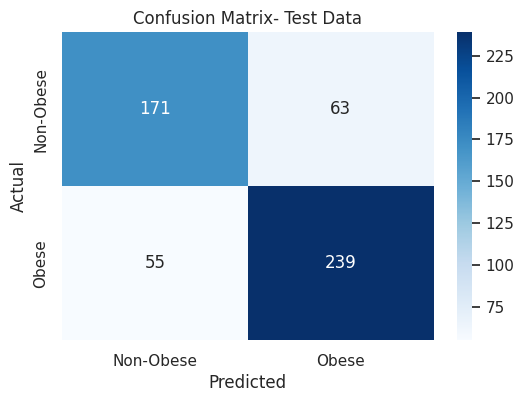

In [ ]:
# Evaluating Effectiveness of Model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 4))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-Obese', 'Obese'], yticklabels=['Non-Obese', 'Obese'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- Test Data')
plt.show()

**Classification Report Analysis**

FPR= 0.270

TNR = 0.731

TPR = 0.813

FNR = 0.187

- The classification report shows that the random forest classification model performs reasonably well. For the False class (non-obese), it has a precision of 0.76, recall of 0.73, and an F1-score of 0.74. For the True class (obese), the precision is 0.79, recall is 0.81, and the F1-score is 0.80.

- Precision measures how many of the predicted positives are actually correct (True Positives).

- Recall measures how many actual positives were correctly identified by the model.

- F1-score is the harmonic mean of precision and recall, providing a balance between the two.

- Overall, the model achieves an accuracy of 77.7%. The macro and weighted averages for precision, recall, and F1-score are all 0.77 and 0.78 respectively, indicating balanced performance across both classes, with a slight edge in detecting the True (obese) class.

In [ ]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [ ]:
# Which features are most important in predicting Obesity
features.head(4)

,0
family_ob_hist,0.273292
freq_high_cal_food,0.025129
phy_act_freq,0.651216
consumption_of_alcohol,0.050363


**Lessons from Random Forest Classification:**

- As seen above, phy_act_freq is the factor which helps the most in predicting Obesity, since it has the highest feature importance score of 0.651.  

- This is followed by family_ob_hist, which has the second highest feature importance score of 0.273.

- freq_high_cal_food is the factor which helps the least in predicting Obesity, since it has the lowest feature importance score of 0.0251.

# **Improving the above Random Forest Classification:**

#GridSearch Cross Validation

In [ ]:
#GridSearch Cross Validation to find the best hyperparameters

from sklearn.model_selection import GridSearchCV


# Define the model
rf = RandomForestClassifier(random_state=11)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100],  # Number of trees
    'criterion': ['entropy'],
    'max_depth': [None, 10],   # Maximum depth of each tree
    'min_samples_split': [10]  # Minimum samples to split a node
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show detailed output
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
print("Accuracy on Test Set:", best_rf.score(X_test, y_test))

# Feature importances
features2 = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=["Importance"])
print(features2.sort_values(by="Importance", ascending=False).head())


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.7545901050193666
Accuracy on Test Set: 0.8049242424242424
                        Importance
phy_act_freq              0.506065
family_ob_hist            0.383939
consumption_of_alcohol    0.076465
freq_high_cal_food        0.033531


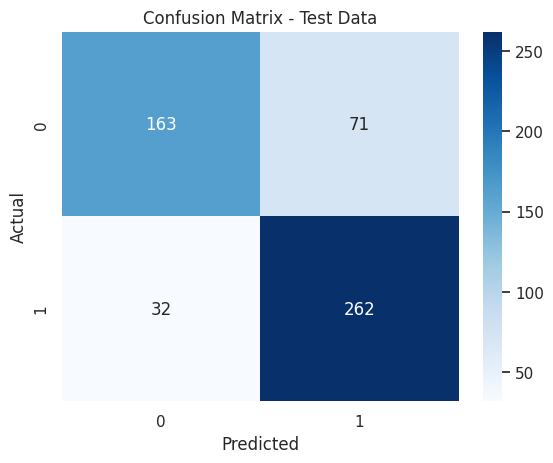


Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.70      0.76       234
        True       0.79      0.89      0.84       294

    accuracy                           0.80       528
   macro avg       0.81      0.79      0.80       528
weighted avg       0.81      0.80      0.80       528

FPR = 0.303
TNR = 0.697
TPR = 0.89
FNR = 0.109


In [ ]:
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Generate confusion matrix
cm2 = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
sb.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("FPR = 0.303")
print("TNR = 0.697")
print("TPR = 0.89")
print("FNR = 0.109")

**Lessons:**

- We used hyper parameters to improve  the previous Random Forest Classification model. Classification Accuracy increased from 0.777 to 0.805. We used GridSearch Cross Validation to find the best hyperparameters and we have a decent cross-validation score of 0.770.

- For example, we set minimum number of samples required to split an internal node (min_samples_split) as 10. If a node has fewer samples than 10, it will not be split. This helps prevent overfitting by ensuring nodes are not split too finely.

- We chose criterion to be entropy, which defines the function used to measure the quality of a split. Choosing 'entropy' means that the model will evaluate splits based on information gain, focusing on maximising the reduction of uncertainty.

- GridSearchCV automatically incorporates cross-validation (5-fold), which helps evaluate the model's performance more robustly. This means the model is trained and validated on different data splits, reducing the risk of overfitting and providing a more reliable estimate of how well the model will perform on unseen data. For Random Forest, which is prone to overfitting if hyperparameters are not well-tuned, cross-validation helps ensure that the model generalizes well.

- In the  two Random Forest Classification models, phy_act_freq helps the most in predicting Obesity, followed by family_ob_hist. freq_high_cal_food helps the least in predicting Obesity.
